In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f"{model_name} Confusion Maxtrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [3]:
file_path = 'C://Users//Chick//AI-class//diabetes.csv'  
df = pd.read_csv(file_path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.drop(columns=['Outcome'])  
y = df['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 특징 스케일링이 중요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print(X_train, y_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  


In [9]:
# 1. Decision Tree 모델
dt_model = DecisionTreeClassifier(random_state=42) # Decision Tree 분류기 객체 생성
dt_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
dt_pred = dt_model.predict(X_test) # 테스트 데이터에 대한 예측 수행

print("Decision Tree 결과:\n", classification_report(y_test, dt_pred)) # Decision Tree 모델의 성능평가

Decision Tree 결과:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Logistic Regression 결과:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



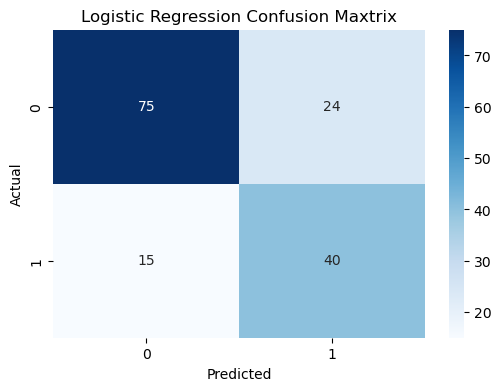

In [10]:
# 2. Logistic Regression 모델
lr_model = LogisticRegression(max_iter=200) # Logistic Regression 분류기 객체 생성
lr_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
lr_pred = lr_model.predict(X_test) # 테스트 데이터에 대한 예측 수행

print("Logistic Regression 결과:\n", classification_report(y_test, dt_pred)) # Logistic Regression 모델의 성능 평가
plot_confusion_matrix(y_test, dt_pred, "Logistic Regression") # Confusion Matrix을 시각화하여 예측 정확도 확인

Support Vector Classifier 결과:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



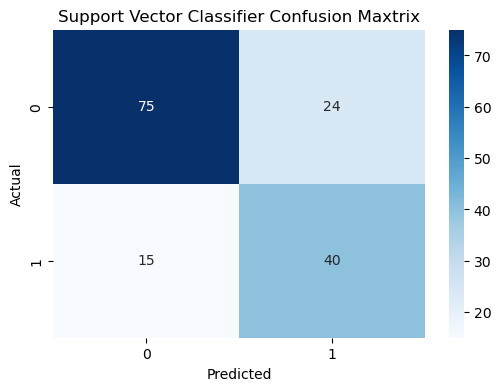

In [11]:
# 3. Support Vector Classifier 모델
svc_model = SVC() # Support Vector Classifier 분류기 객체 생성
svc_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
svc_pred = svc_model.predict(X_test) # 테스트 데이터에 대한 예측 수행
print("Support Vector Classifier 결과:\n", classification_report(y_test, dt_pred)) # Support Vector Classifier 모델의 성능 평가  
plot_confusion_matrix(y_test, dt_pred, "Support Vector Classifier") # Confusion Matrix을 시각화하여 예측 정확도 확인

Rancom Forest 결과:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



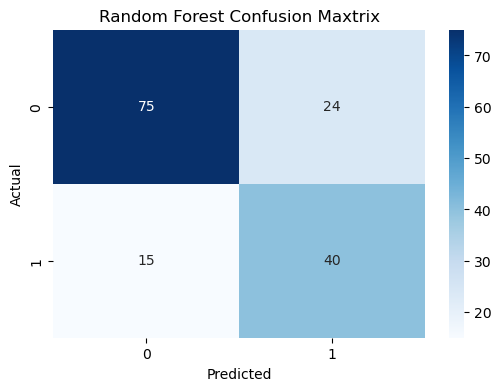

In [12]:
# 4. Random Forest 모델
rf_model = RandomForestClassifier() # Random Forest 분류기 객체 생성
rf_model.fit(X_train, y_train) # 학습 데이터를 활용해 모델 훈련
rf_pred = rf_model.predict(X_test) # 테스트 데이터에 대한 예측을 수행

print("Rancom Forest 결과:\n", classification_report(y_test, dt_pred)) #Random Forest 모델의 성능 평가(classification_report 출력)
plot_confusion_matrix(y_test, dt_pred, "Random Forest") # Confusion Maxtrix를 시각화하여 예측 정확도 확인

In [13]:
# KNN 모델 훈련 (k=3으로 설정)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# 모델 훈련
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

예측 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
실제 값: 668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64
정확도: 64.29%
혼동 행렬:
[[99  0]
 [55  0]]


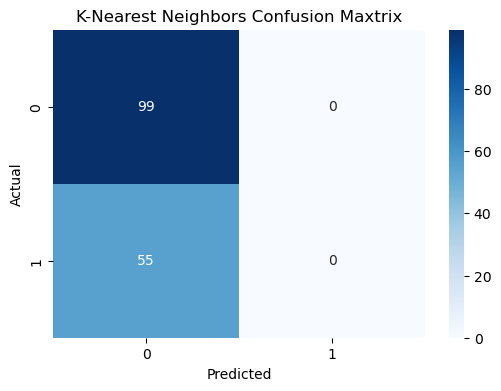

In [14]:
# K-Nearest Neighbors 모델
knn = KNeighborsClassifier(n_neighbors=3)  # k=3으로 설정
knn.fit(X_train_scaled, y_train)

# 모델 훈련
knn.fit(X_train, y_train)

# 예측한 값과 정답 비교
### X_train이 DataFrame이라면, X_train의 열 이름을 X_test_scaled에 적용
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
y_pred = knn.predict(X_test_scaled_df)


# 예측값과 실제값 비교
print("예측 값:", y_pred)
print("실제 값:", y_test)

# 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy * 100:.2f}%")

# 혼동 행렬 출력
cm = confusion_matrix(y_test, y_pred)
print("혼동 행렬:")
print(cm)

plot_confusion_matrix(y_test, y_pred, "K-Nearest Neighbors") # Confusion Maxtrix를 시각화하여 예측 정확도 확인